### ASSIGNMENT 4

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

### **Question 1**  
Write a function that will generate chi-square random variables with $\nu$ degrees of freedom by generating $\nu$ standard normals, squaring them and then adding them up. This uses the fact that  

$$X = Z_1^2 + \dots + Z_\nu^2$$  

is chi-square with $\nu$ degrees of freedom. Generate some random variables and plot a histogram.  
The degrees of freedom should be an input argument set by the user.  
Generate also chi-square random variables with the same $\nu$ using the available `chi2rnd` function and contrast your results.

----


In [1]:
from scipy.stats import chi2

def chi_square(nu, size=1000, seed=0):
    rng = np.random.default_rng(seed)
    Z = rng.standard_normal((size, nu))
    X = np.sum(Z**2, axis=1)
    return X

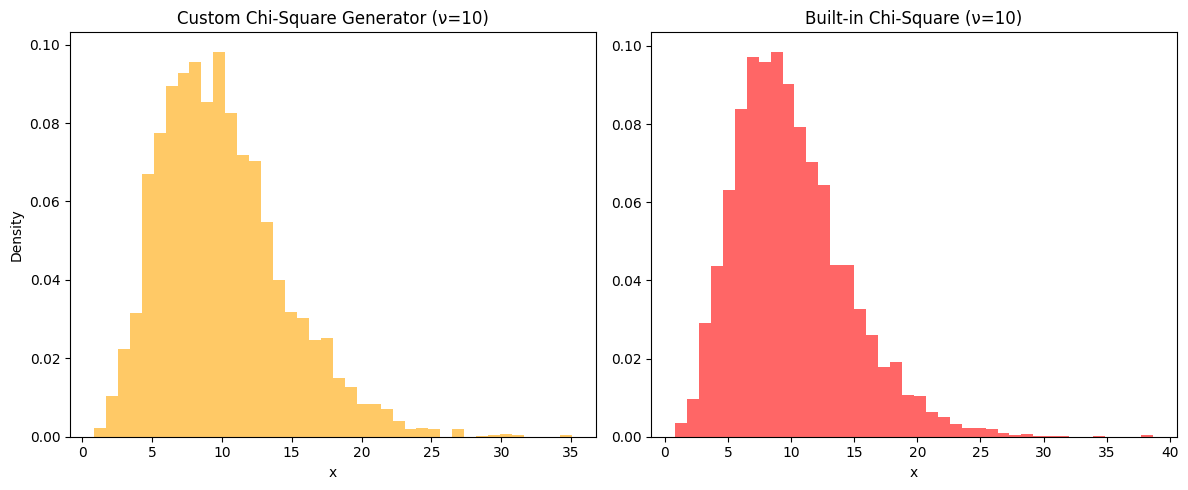

In [4]:
nu = 10 
size = 5000

x_generated = chi_square(nu, size=size, seed=42)
x_builtin = chi2.rvs(df=nu, size=size, random_state=42)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(x_generated, bins=40, density=True, alpha=0.6, color='orange')
plt.title(f"Custom Chi-Square Generator (ν={nu})")
plt.xlabel("x")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.hist(x_builtin, bins=40, density=True, alpha=0.6, color='red')
plt.title(f"Built-in Chi-Square (ν={nu})")
plt.xlabel("x")

plt.tight_layout()
plt.show()

---

### **Question 2**  
Generate four sets of random variables with $\nu = 2, 5, 15, 20$ using the function `chi2rnd`.  
Create histograms for each sample.  
How does the shape of the distribution depend on the degrees of freedom $\nu$?


---

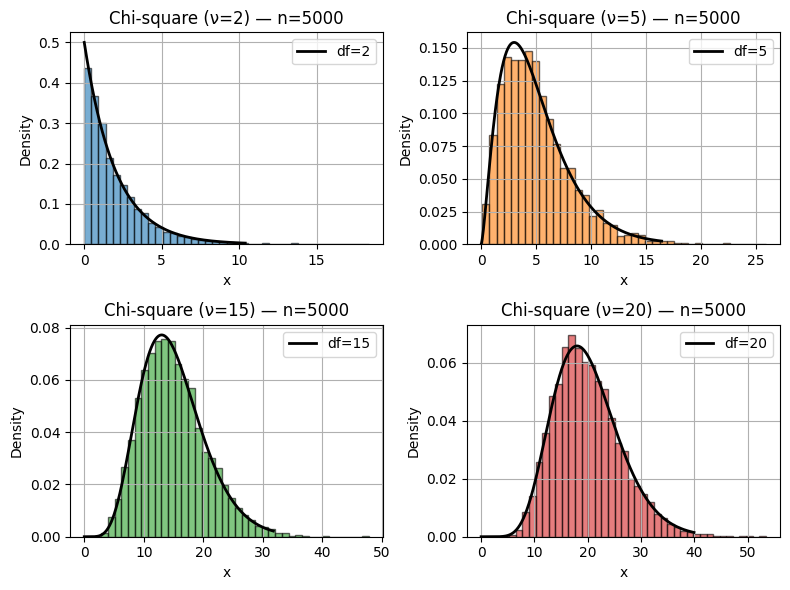

In [7]:
dfs = [2, 5, 15, 20]
size = 5000
rng = np.random.default_rng(12345)

plt.figure(figsize=(8, 6))

for i, nu in enumerate(dfs, start=1):
    x = chi2.rvs(df=nu, size=size, random_state=rng)
    
    ax = plt.subplot(2, 2, i)
    counts, bins, _ = ax.hist(x, bins=40, density=True, alpha=0.6, color='C{}'.format(i-1), edgecolor='k')
    
    xs = np.linspace(0, np.percentile(x, 99.5), 500)
    pdf = chi2.pdf(xs, df=nu)
    ax.plot(xs, pdf, 'k-', lw=2, label=f'df={nu}')
    
    ax.set_title(f'Chi-square (ν={nu}) — n={size}')
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

- For small values of $\nu$ the distribution is more right-skewed with a peak near zero.
- As $\nu$ increases the distribution becomes more symmetric and the peak moves right; the distribution looks more bell-shaped.

---

### **Question 3**  
To generate a random variable $X$ from a beta distribution with parameters $\alpha$ and $\beta$, consider the method:  

Generate $Y_1 = U_1^{1/\alpha}$ and $Y_2 = U_2^{1/\beta}$  where the $U_i$ are uniform random variables.  

If $Y_1 + Y_2 \le 1$, then  

$$X = \frac{Y_1}{Y_1 + Y_2}.$$

Implement this algorithm.  
Generate also beta random variables with the same parameters using the available `betarnd` function and contrast your results.


---

In [8]:
from scipy.stats import beta

def generate_beta(alpha, beta_param, size=5000, seed=0):
    rng = np.random.default_rng(seed)
    samples = []

    while len(samples) < size:
        U1 = rng.uniform()
        U2 = rng.uniform()

        Y1 = U1 ** (1/alpha)
        Y2 = U2 ** (1/beta_param)

        if Y1 + Y2 <= 1:
            X = Y1 / (Y1 + Y2)
            samples.append(X)

    return np.array(samples)

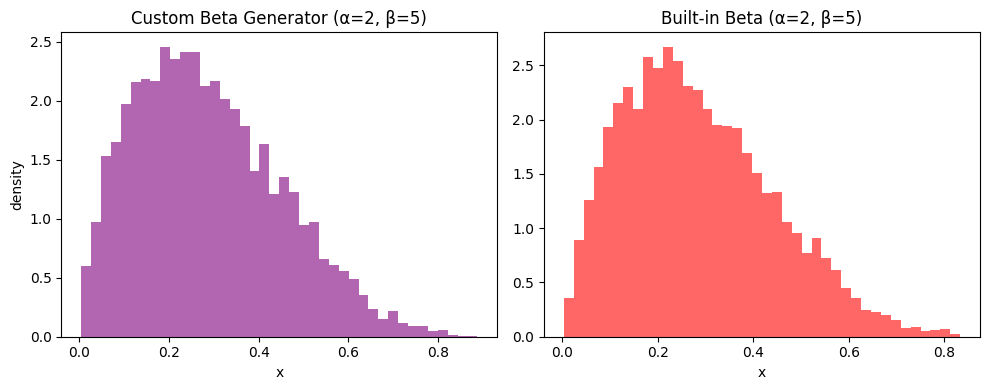

In [10]:
alpha = 2
beta_param = 5
size = 5000

x_generated = generate_beta(alpha, beta_param, size=size, seed=42)
x_builtin = beta.rvs(alpha, beta_param, size=size, random_state=42)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(x_generated, bins=40, density=True, alpha=0.6, color='purple')
plt.title(f"Custom Beta Generator (α={alpha}, β={beta_param})")
plt.xlabel("x")
plt.ylabel("density")

plt.subplot(1,2,2)
plt.hist(x_builtin, bins=40, density=True, alpha=0.6, color='red')
plt.title(f"Built-in Beta (α={alpha}, β={beta_param})")
plt.xlabel("x")

plt.tight_layout()
plt.show()

- The two histograms show similar outputs, confirming the correctness of the beta variable generator algorithm.


---

### **Question 4**  
Generate 1000 binomial random variables for $n = 5$ and $p = 0.3,\ 0.5,\ 0.8$.  
For each case, determine the observed relative frequencies and the corresponding theoretical probabilities.  
How is the agreement between them?


---

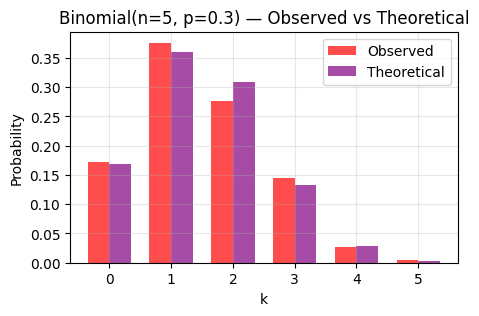

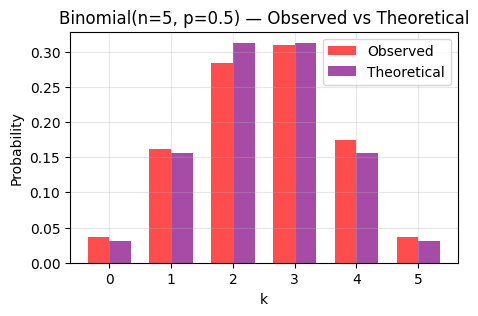

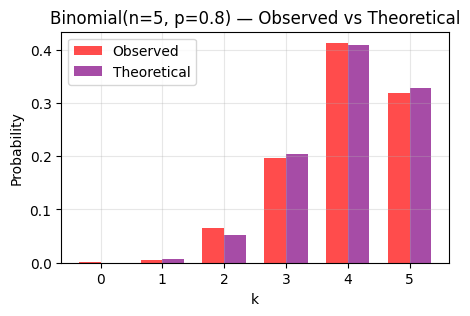

In [14]:
from scipy.stats import binom

np.random.seed(0)

n = 5
ps = [0.3, 0.5, 0.8]
size = 1000

for p in ps:
    samples = np.random.binomial(n, p, size)
    
    counts = np.bincount(samples, minlength=n+1)
    rel_freq = counts / size
    
    k = np.arange(0, n+1)
    theoretical = binom.pmf(k, n, p)

    plt.figure(figsize=(5,3))
    width = 0.35

    plt.bar(k - width/2, rel_freq, width=width, label='Observed', alpha=0.7, color='red')
    plt.bar(k + width/2, theoretical, width=width, label='Theoretical', alpha=0.7, color='purple')

    plt.title(f'Binomial(n={n}, p={p}) — Observed vs Theoretical')
    plt.xlabel('k')
    plt.ylabel('Probability')
    plt.xticks(k)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

For each value of $p = 0.3,\ 0.5,\ 0.8$ we generate 1000 samples from the binomial distribution $\text{Bin}(n=5, p)$.

The empirical frequencies are very close to the theoretical binomial probabilities, with small deviations due to sampling variation. As the sample size increases, the match becomes even closer.


---

### **Question 5**  
Generate random variables from the bivariate $t$ distribution for $\nu = 5,\ 15,\ 25,\ 35$.  
Use the correlation matrix  

$$\Sigma = \begin{pmatrix}1 & -0.8 \\ -0.8 & 1\end{pmatrix}$$  

and sample size $n = 100$.  
Construct scatterplots and compare them to a scatterplot of bivariate normal random variables with the same $\Sigma$ and $n$.


---

In [15]:
from scipy.stats import t, multivariate_normal

np.random.seed(0)

# correlation matrix Σ
Sigma = np.array([[1, -0.8],
                  [-0.8, 1]])

# Cholesky decomposition for covariance structure
L = np.linalg.cholesky(Sigma)

dfs = [5, 15, 25, 35]
n = 100

def generate_bivariate_t(df, n, Sigma):
    ### generates n samples from a bivariate t distribution with df degrees of freedom.

    # 1: Z ~ N(0, Σ)
    Z = np.random.multivariate_normal(mean=[0, 0], cov=Sigma, size=n)
    # 2: W ~ chi-square(df)
    W = np.random.chisquare(df, size=n)
    # 3: X = Z * sqrt(df / W)
    X = Z * np.sqrt(df / W)[:, None]
    return X

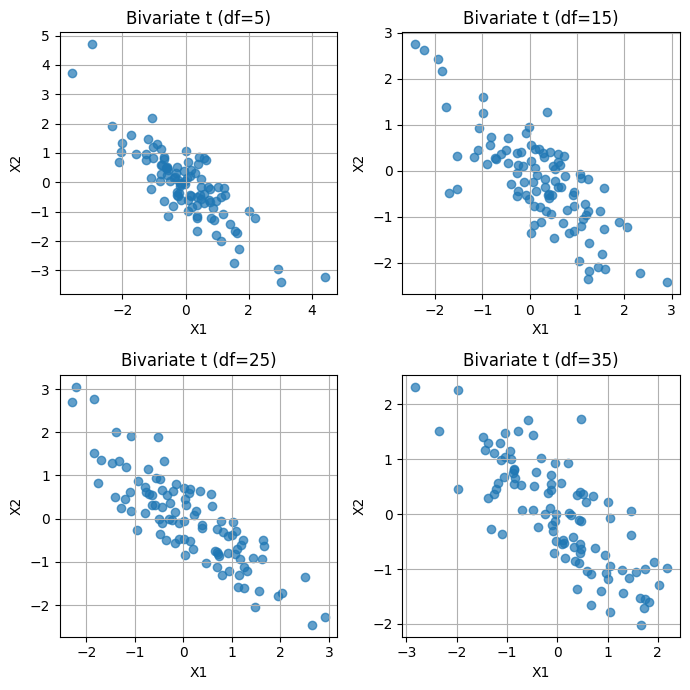

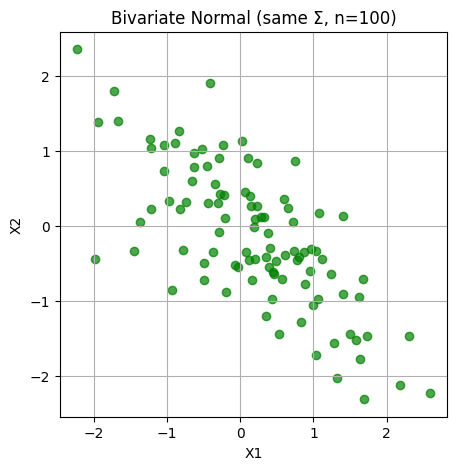

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for ax, df in zip(axes.flatten(), dfs):
    X = generate_bivariate_t(df, n, Sigma)
    ax.scatter(X[:,0], X[:,1], alpha=0.7)
    ax.set_title(f"Bivariate t (df={df})")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.grid(True)

plt.tight_layout()
plt.show()

X_norm = np.random.multivariate_normal(mean=[0,0], cov=Sigma, size=n)

plt.figure(figsize=(5,5))
plt.scatter(X_norm[:,0], X_norm[:,1], alpha=0.7, color='green')
plt.title("Bivariate Normal (same Σ, n=100)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

- For smaller values of $\nu$ , the scatterplot has many extreme points.
- As $\nu$ increases, the distribution becomes closer to a bivariate normal:
  - the outliers reduce,
  - the cloud becomes more elliptical.

Its scatterplot is compact and elliptical, showing how the *t* distribution approaches the normal distribution as $\nu \to \infty$.


---

### **Question 6**  
The heights of 32 Tibetan skulls (mm) are given in the file **tibetan**.  
These data comprise two groups:  
- 17 skulls from graves in Sikkim and nearby areas  
- 15 skulls from a battlefield in Lhasa  

The data contain five measurements:  
$X_1$ (greatest skull length),  
$X_2$ (greatest horizontal breadth),  
$X_3$ (height),  
$X_4$ (upper face height),  
$X_5$ (face breadth).  

Create a quantile plot of the Tibetan skull data using standard normal quantiles.  
Is it reasonable to assume the data follow a normal distribution?


---

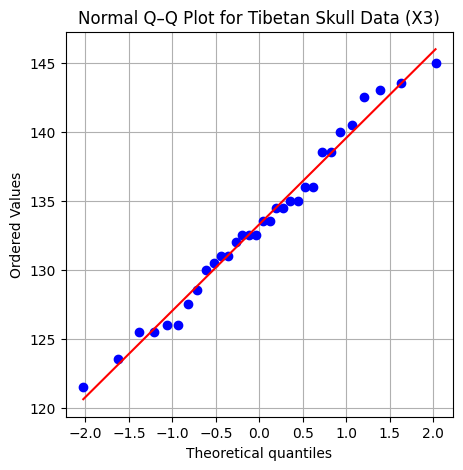

In [20]:
import scipy.stats as stats
from scipy.io import loadmat

# Load .mat file
data = loadmat("Data Files/tibetan.mat")    
X_full = data["tibetan"]   

# Choose measurement X3 (height)
X = X_full[:, 2]

# Normal Q–Q plot
plt.figure(figsize=(5, 5))
stats.probplot(X, dist="norm", plot=plt)
plt.title("Normal Q–Q Plot for Tibetan Skull Data (X3)")
plt.grid(True)
plt.show()

If the data are approximately normal, the points in the Q–Q plot should fall roughly along a
straight line.

- The central points generally follow the straight line, meaning the center of the distribution is close to normal.  
- Deviations near the tails indicate deviations from normality.  
- Based on the plot, the assumption of normality is reasonable: the data are close to normal in the plot.

Thus, we can say that the data follows a normal distribution.

---

### **Question 7**  
In the **counting** data set, we have the number of scintillations in 72-second intervals arising from radioactive decay of polonium.  
Construct a **Poissonness plot**.  
Does this indicate agreement with the Poisson distribution?


---

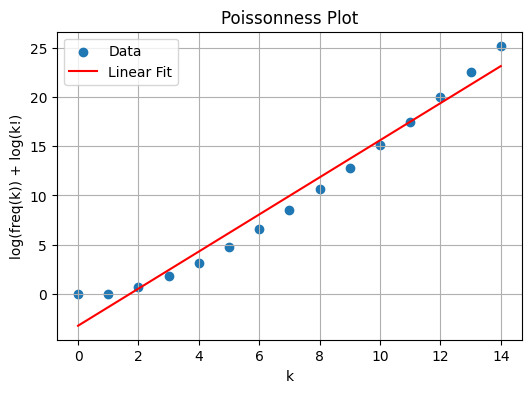

In [31]:
import scipy.special as sp

data = loadmat("Data Files/counting.mat")
counts = data["count"].flatten()

unique, freq = np.unique(counts, return_counts=True)

# we need to do Poissonness transform as Y_k = log(freq_k) + log(k!)
Y = np.log(freq) + np.log(sp.factorial(unique))

slope, intercept = np.polyfit(unique, Y, 1) # polynomial fitting
Y_fit = slope * unique + intercept

plt.figure(figsize=(6,4))
plt.scatter(unique, Y, label="Data")
plt.plot(unique, Y_fit, color="red", label="Linear Fit")
plt.title("Poissonness Plot")
plt.xlabel("k")
plt.ylabel("log(freq(k)) + log(k!)")
plt.grid(True)
plt.legend()
plt.show()

We use a Poissonness plot to check whether count data follow a Poisson distribution.

PDF for a Poisson random variable with parameter $\lambda$: $P(X=k)=e^{-\lambda}\frac{\lambda^k}{k!}$

The Poissonness transform is used as follows: $Y_k = \log(\text{freq}(k)) + \log(k!)$

- The transformed values fall very close to the line across the calculated range. There are no significant curvatures or outliers indicated in the plot.

- Thus, we can say that this plot indicates that the data follows a Poisson distribution.

----

### **Question 8**  
The **biology** data set contains the number of research papers for 1534 biologists.  
Variables `numpaps` and `freqs` correspond to the number of papers per author and the observed number of authors.  
Construct a **binomial plot** of these data.  
Analyze your results.


---

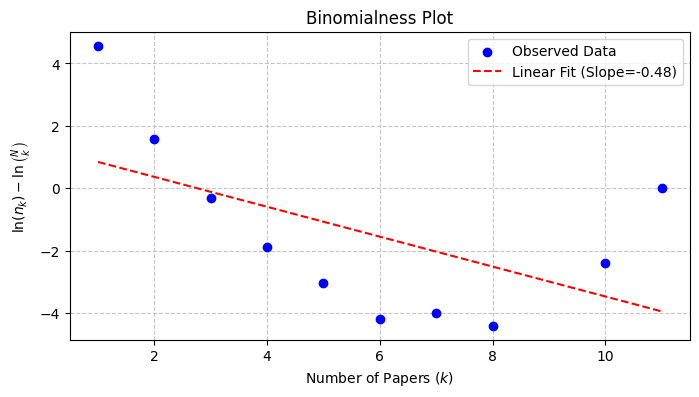

In [47]:
from scipy.io import loadmat
from scipy.special import gammaln

def create_binomial_plot():
    data = loadmat("Data Files/biology.mat")
    numpaps = data["numpaps"].flatten()
    freqs = data["freqs"].flatten()

    # filter out zero frequencies
    mask = freqs > 0
    k = numpaps[mask]     
    n_k = freqs[mask] 

    N = np.max(numpaps)

    # The plot compares ln(observed) against the log of the binomial coefficient.
    # Y = ln(n_k) - ln(Combination(N, k))
    
    # use transformation as gammaln for factorial terms: ln(x!) = gammaln(x+1)
    # ln(N choose k) = ln(N!) - ln(k!) - ln((N-k)!)
    log_comb = gammaln(N + 1) - gammaln(k + 1) - gammaln(N - k + 1)
    y_values = np.log(n_k) - log_comb

    plt.figure(figsize=(8, 4))
    plt.scatter(k, y_values, color='blue', label='Observed Data', zorder=5)

    slope, intercept = np.polyfit(k, y_values, 1)
    plt.plot(k, slope * k + intercept, color='red', linestyle='--', label=f'Linear Fit (Slope={slope:.2f})')

    plt.title(f"Binomialness Plot")
    plt.xlabel("Number of Papers ($k$)")
    plt.ylabel(r"$\ln(n_k) - \ln\binom{N}{k}$")
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.show()
    
    return slope

# Run the function
slope = create_binomial_plot()

- There are strong deviations from the line, the points do not fall close to the regression line. 

- There is a significant curved pattern in the data points shown in the plot.

- We can say that the plot indicates that the data does not follow a binomial distribution. 

---

### **Question 9**  
The **thrombos** data set contains measurements of urinary-thromboglobulin excretion in 12 normal and 12 diabetic patients.  
Place each group into a column of a matrix and use a **boxplot** to compare normal vs. diabetic patients.


---

/var/folders/tm/0v_xzs6s5vzfw60jkby5vd980000gn/T/ipykernel_7122/2683883008.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(plot_data, labels=['Normal', 'Diabetic'], patch_artist=True)


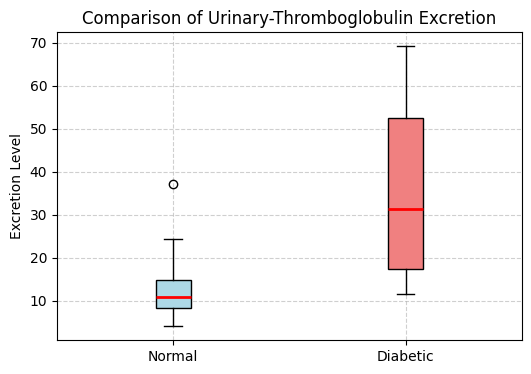

Normal - Median: 10.95, Std Dev: 8.80
Diabetic - Median: 31.35, Std Dev: 19.41


In [43]:
from scipy.io import loadmat

def analyze_thrombos():
   
    data = loadmat("Data Files/thrombos.mat")
    normal = data["normal"].flatten()
    diabetic = data["diabetic"].flatten()
    
    plot_data = [normal, diabetic]
    plt.figure(figsize=(6, 4))
    
    bp = plt.boxplot(plot_data, labels=['Normal', 'Diabetic'], patch_artist=True)
    
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    for median in bp['medians']:
        median.set(color='red', linewidth=2)

    plt.title('Comparison of Urinary-Thromboglobulin Excretion')
    plt.ylabel('Excretion Level')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.show()
    
    # descriptive statistics
    print(f"Normal - Median: {np.median(normal):.2f}, Std Dev: {np.std(normal):.2f}")
    print(f"Diabetic - Median: {np.median(diabetic):.2f}, Std Dev: {np.std(diabetic):.2f}")

analyze_thrombos()

- The median urinary-thromboglobulin excretion level is significantly higher for diabetic patients compared to normal patients.

- The diabetic group shows much greater variability, the normal group is more compact, suggesting consistent excretion levels among healthy individuals.

- The normal group contains a distinct outlier, representing a single individual with an unusually high value (~37) for that group, whereas the diabetic group has a wide range without distinct outliers in this plot.

- The diabetic distribution appears positively skewed right, indicating that some diabetic patients have extremely high excretion levels.

---

### **Question 10**  
The **bank** data contains two matrices: measurements on genuine money and on forged money.  
Use visualization techniques from this chapter to explore the data (e.g., scatterplots, parallel coordinates, matrix plots, etc.).


---

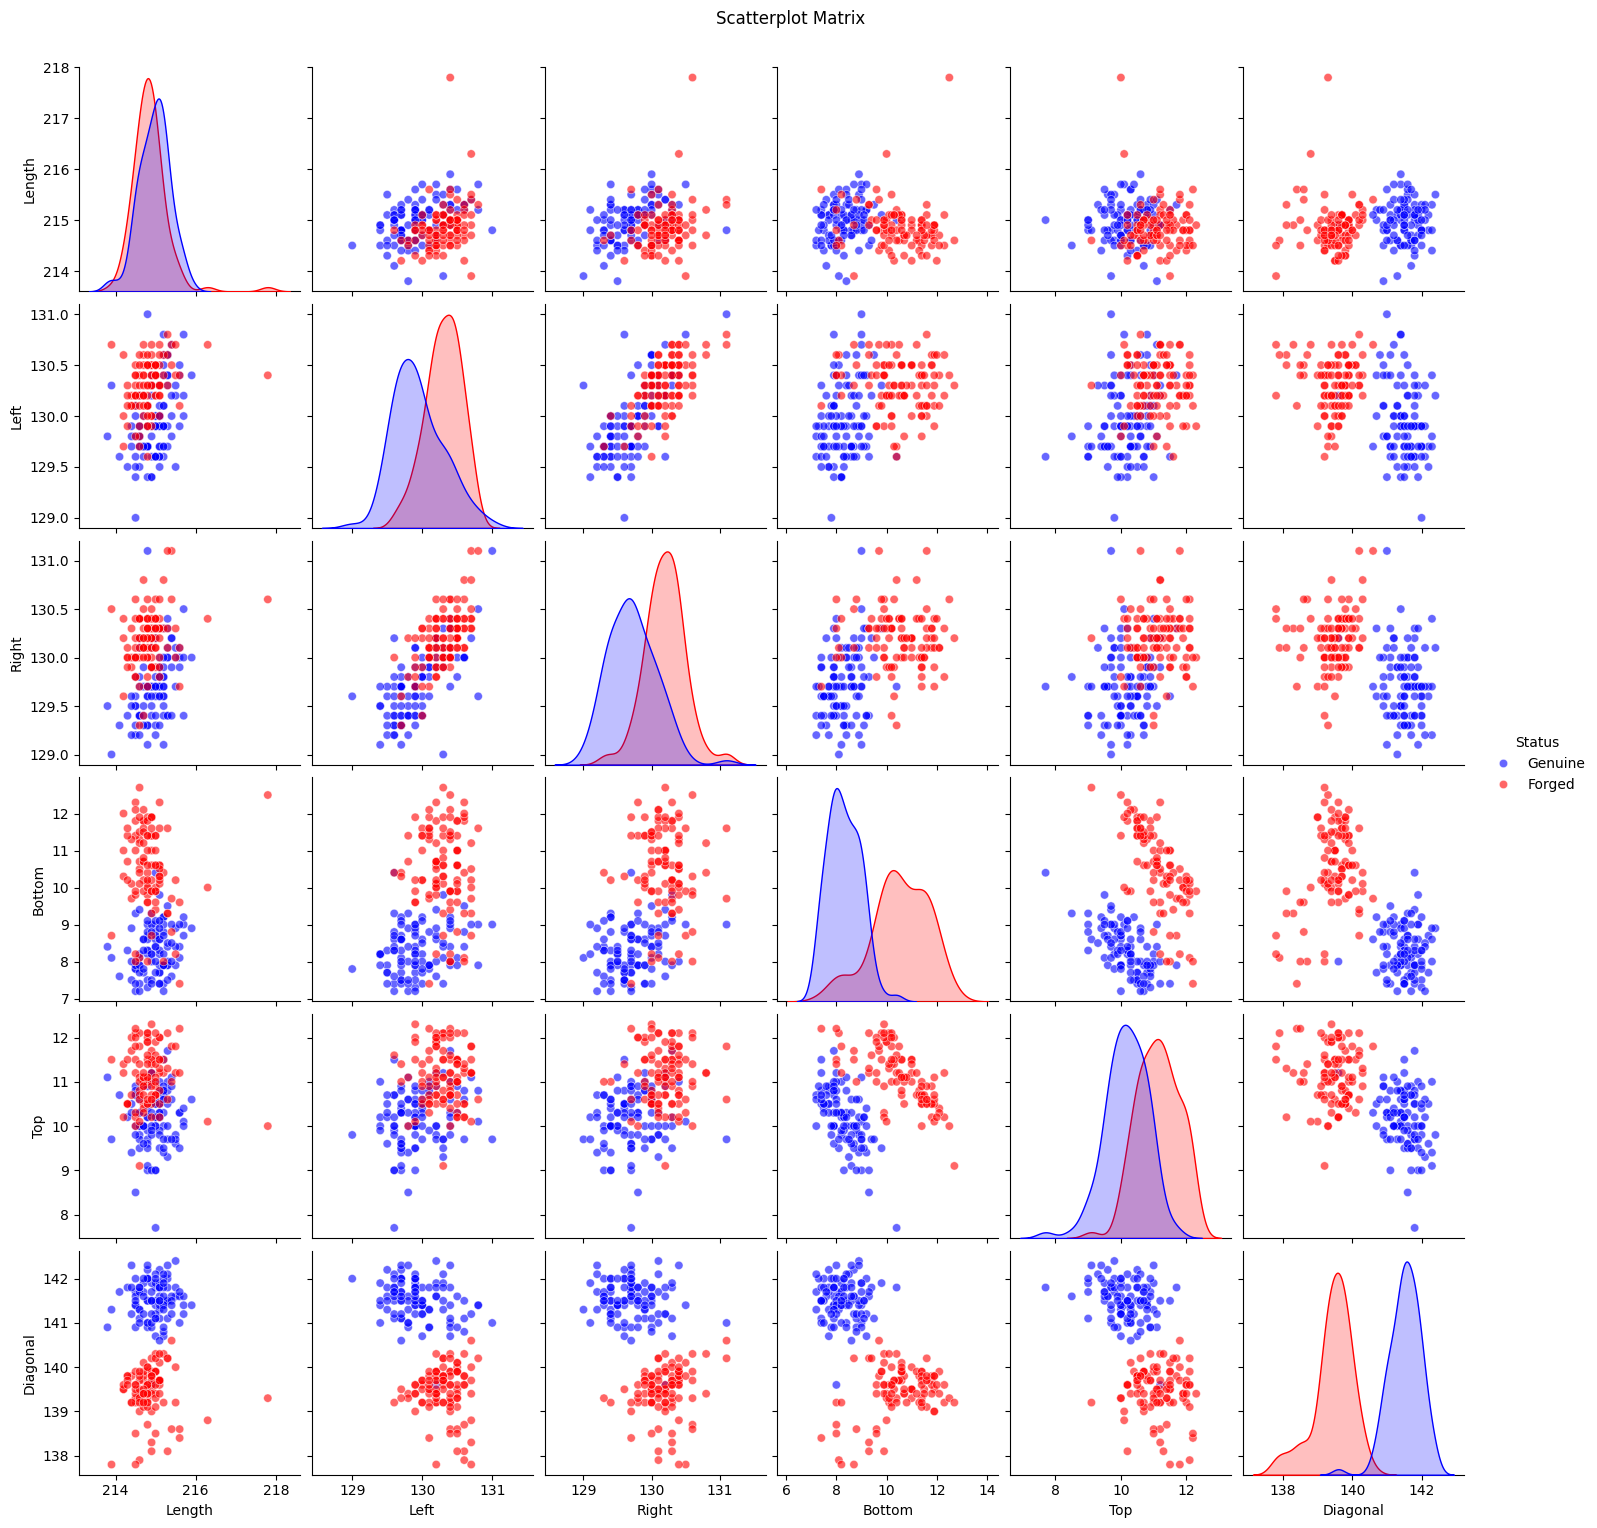

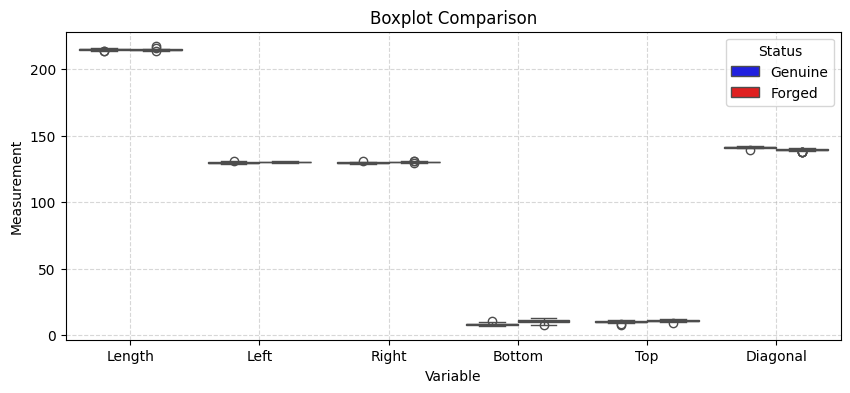

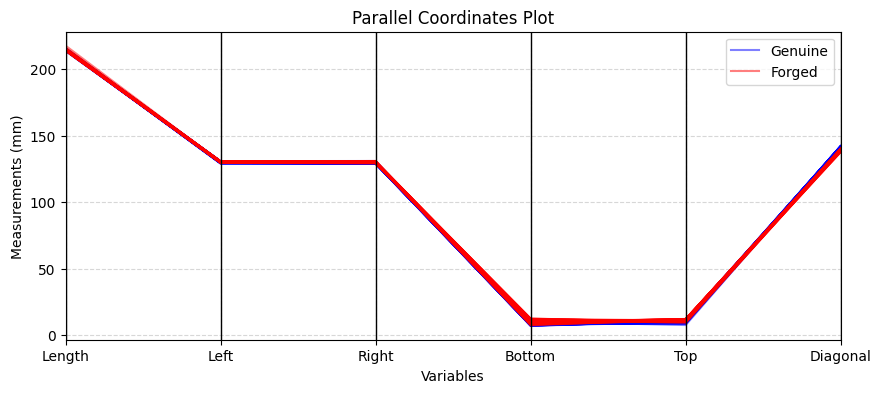

In [48]:
import seaborn as sns
from scipy.io import loadmat
from pandas.plotting import parallel_coordinates


def explore_bank_data():
    data = loadmat('Data Files/bank.mat')
    genuine = data['genuine']
    forge = data['forge']

    columns = ['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']
    
    df_gen = pd.DataFrame(genuine, columns=columns)
    df_gen['Status'] = 'Genuine'
    df_forge = pd.DataFrame(forge, columns=columns)
    df_forge['Status'] = 'Forged'
    
    df = pd.concat([df_gen, df_forge], ignore_index=True)

    sns.pairplot(df, hue='Status', palette={'Genuine': 'blue', 'Forged': 'red'}, 
                 diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle("Scatterplot Matrix", y=1.02)
    plt.show()

    plt.figure(figsize=(10, 4))
    df_melt = df.melt(id_vars='Status', var_name='Variable', value_name='Measurement')
    sns.boxplot(x='Variable', y='Measurement', hue='Status', 
                data=df_melt, palette=['blue', 'red'])
    plt.title("Boxplot Comparison")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    plt.figure(figsize=(10, 4))
    parallel_coordinates(df, 'Status', color=['blue', 'red'], alpha=0.5)
    plt.title("Parallel Coordinates Plot")
    plt.xlabel("Variables")
    plt.ylabel("Measurements (mm)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

explore_bank_data()

- Scatterplot Matrix: This matrix shows that while dimensions like Length overlap significantly, plotting the Diagonal against the Bottom Margin creates two completely separate clusters, indicating these two variables together effectively distinguish genuine notes from forgeries.

- Boxplots: The side-by-side comparisons shows that Forged notes differ from Genuine ones by having significantly shorter diagonal lengths and wider bottom margins.

- Parallel Coordinates: This plot displays a characteristic "crisscross" pattern where the profiles diverge sharply at the final axis.